In [3]:
import pandas as pd
import numpy as np

In [123]:
ukD = pd.read_csv('Titanic-Dataset.csv')
ukD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
ukD.duplicated().sum()

0

In [125]:
#Mean,Mode,Median

mean = ukD.Age.mean()
print(mean)

Mode = ukD.Age.mode().iloc[0]
print(Mode)

Median = ukD.Age.median()
print(Median)

29.69911764705882
24.0
28.0


In [126]:
ukD.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
ukD = ukD.drop(['Cabin'],axis=1)
ukD.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [128]:
ukD.Age = ukD.Age.fillna(mean)
ukD.dropna(inplace=True)
ukD.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [129]:
ukD.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [130]:
ukD.select_dtypes(exclude=['number']).columns.to_list()

['Name', 'Sex', 'Ticket', 'Embarked']

In [131]:
x = ukD.drop(['Name','Survived','Ticket','PassengerId'],axis=1)
y = ukD.Survived

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [132]:
#Outlier in age

df = ukD.sort_values(by='Age',ascending=True)

q1 = np.percentile(df['Age'],25)
q3 = np.percentile(df['Age'],75)

iqr = q3-q1
iqr


lwr = q1 - (1.5*iqr)
upr = q3 + (1.5*iqr)

print(lwr)
print(upr)



2.5
54.5


In [133]:
cat = x.select_dtypes(exclude=['number']).columns.to_list()

from sklearn.preprocessing import LabelEncoder

for i in cat:
    lbl = LabelEncoder()
    x[i] = lbl.fit_transform(x[i])
    
x.head()
    


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [134]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [135]:
#ANN

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)


c:\Users\hp\anaconda3\envs\ML_Lab1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7921348314606742

In [136]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train,y_train)
nb.score(x_test,y_test)

0.7752808988764045

In [137]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7528089887640449

In [138]:
#SVM

from sklearn.svm import SVC
sv = SVC()

sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.6853932584269663

In [139]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7078651685393258

In [140]:
#PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_new = pca.fit_transform(x)
x_new = pd.DataFrame(x_new)
x_new.head()


x_tr,x_te,y_tr,y_te = train_test_split(x_new,y,test_size=0.2,random_state=42)

new_nb = SVC()
new_nb.fit(x_tr,y_tr)

new_nb.score(x_te,y_te)

0.6853932584269663

In [5]:
#Kmeans

df = pd.read_csv('wine1.csv')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,max_iter=400)

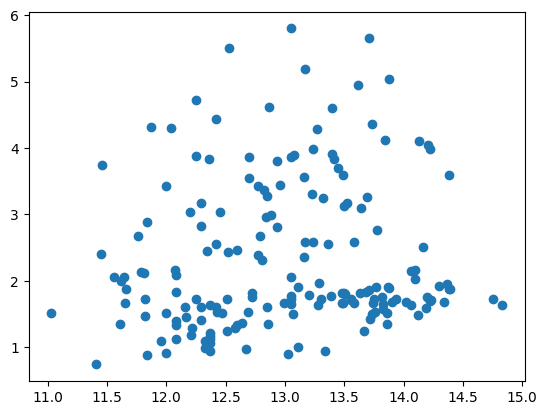

In [13]:
from matplotlib import pyplot as plt

plt.scatter(df['B'],df['C'])

In [14]:
pred = km.fit_predict(df[['B','C']])

df['pred'] = pred
df.head()

c:\Users\hp\anaconda3\envs\ML_Lab1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,pred
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


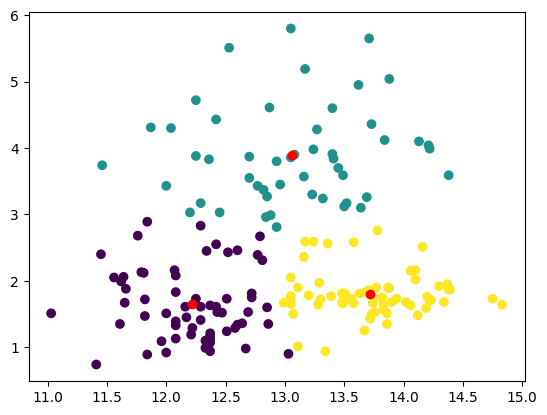

In [15]:
plt.scatter(df['B'],df['C'],c = df['pred'])
center = km.cluster_centers_
plt.scatter(center[:,0],center[:,1],color='red')